# Name.- Praveer Raj
# Roll no. - 1
# Reg no. - 230957002

# WEEK 6

In [5]:
pip install contractions

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 289.9/289.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### EXER 1
Download the "Womens Clothing E-Commerce Reviews.zip" file and answer the following:
1. Preprocessing:
a. Find any null values are present or not, If present remove those data.
b. Remove the data that have less than 5 reviews.
c. Clean the data and remove the special characters and replace the contractions with its 
expansion. Convert the uppercase character to lower case. Also, remove the 
punctuations.
2. Separate the columns into dependent and independent variables (or features and 
labels). Then you split those variables into train and test sets (80:20).
3. Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if 
item is recommended
4. Tabulate accuracy in terms of precision, recall and F1 score.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maths\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maths\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


              precision    recall  f1-score   support

           0       0.87      0.18      0.29       792
           1       0.84      0.99      0.91      3464

    accuracy                           0.84      4256
   macro avg       0.85      0.58      0.60      4256
weighted avg       0.85      0.84      0.80      4256



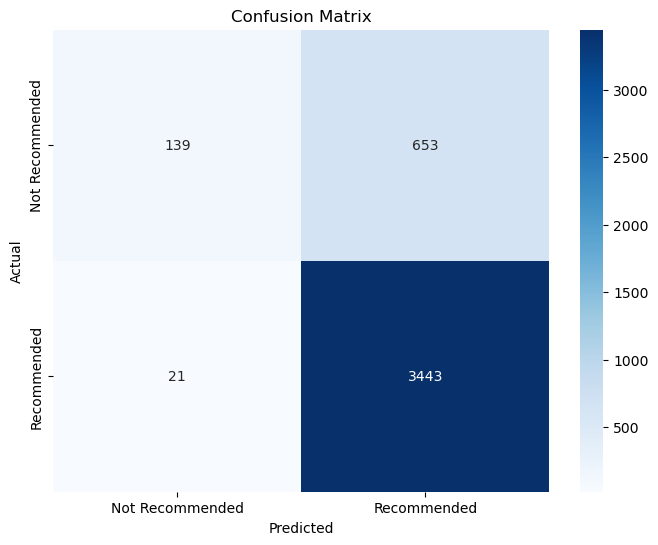

In [14]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from contractions import fix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

file_path = r"C:\Users\maths\Desktop\ML Week 6\Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(file_path)

df = df.dropna(subset=['Review Text'])
df = df.groupby('Clothing ID').filter(lambda x: len(x) >= 5)

def clean_text(text):
    text = fix(text)
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Review Text'] = df['Review Text'].apply(clean_text)

X = df['Review Text']
y = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred = nb_classifier.predict(X_test_tfidf)

report = classification_report(y_test, y_pred)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### EXER 2
1. Data Preprocessing and Feature Engineering
• Load the dataset and explore its structure.
• Identify and handle missing values appropriately.
• Perform feature selection by calculating correlation coefficients and removing 
highly correlated features.
• Convert continuous variables into categorical bins where appropriate (e.g., 
discretizing age-based rates).
• Apply dimensionality reduction techniques such as PCA to optimize feature 
space.
• Create a binary target variable based on whether the 'Total.Rate' is above or below 
the third quartile, making classification more challenging.
2. Split the dataset into training and testing sets with an 80-20 ratio.
3. Implementing Naïve Bayes 
• Select the following features for classification:
o Rates.Age.< 18
o Rates.Age.18-45
o Rates.Age.45-64
o Rates.Age.> 64
o Types.Lung.Race.White
o Types.Lung.Race.Black
o Types.Lung.Race.Hispanic
• Train multiple Naïve Bayes models (GaussianNB, MultinomialNB, and 
BernoulliNB) using only the selected features.
• Compare the models based on precision, recall, F1-score, and AUC-ROC curve.
• Analyze the assumptions of each Naïve Bayes variant and determine which one 
fits the dataset best.

In [10]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, roc_auc_score

nltk.download('stopwords')
nltk.download('punkt')

file_path = r"C:\Users\maths\Desktop\ML Week 6\cancer.csv"
df = pd.read_csv(file_path)

print("Columns in dataset:", df.columns)

df = df.dropna()
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df = df.drop(columns=to_drop)

if 'Age' in df.columns:
    age_bins = [0, 18, 45, 64, np.inf]
    age_labels = ['<18', '18-45', '45-64', '>64']
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
else:
    print("Warning: 'Age' column not found in dataset.")

if 'Total.Rate' in df.columns:
    y = (df['Total.Rate'] > df['Total.Rate'].quantile(0.75)).astype(int)
else:
    raise KeyError("Column 'Total.Rate' not found in dataset.")

selected_features = ['Rates.Age.< 18', 'Rates.Age.18-45', 'Rates.Age.45-64', 'Rates.Age.> 64', 'Types.Lung.Race.White', 'Types.Lung.Race.Black', 'Types.Lung.Race.Hispanic']
missing_features = [feature for feature in selected_features if feature not in df.columns]
if missing_features:
    raise KeyError(f"Missing features in dataset: {missing_features}")

X = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=min(5, X_train.shape[1]))
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_pred)
    print(f"{name} Model:")
    print(f"Precision: {report['1']['precision']}")
    print(f"Recall: {report['1']['recall']}")
    print(f"F1 Score: {report['1']['f1-score']}")
    print(f"AUC-ROC: {auc}")
    print("-" * 50)


Columns in dataset: Index(['State', 'Total.Rate', 'Total.Number', 'Total.Population',
       'Rates.Age.< 18', 'Rates.Age.18-45', 'Rates.Age.45-64',
       'Rates.Age.> 64', 'Rates.Age and Sex.Female.< 18',
       'Rates.Age and Sex.Male.< 18', 'Rates.Age and Sex.Female.18 - 45',
       'Rates.Age and Sex.Male.18 - 45', 'Rates.Age and Sex.Female.45 - 64',
       'Rates.Age and Sex.Male.45 - 64', 'Rates.Age and Sex.Female.> 64',
       'Rates.Age and Sex.Male.> 64', 'Rates.Race.White',
       'Rates.Race.White non-Hispanic', 'Rates.Race.Black', 'Rates.Race.Asian',
       'Rates.Race.Indigenous', 'Rates.Race and Sex.Female.White',
       'Rates.Race and Sex.Female.White non-Hispanic',
       'Rates.Race and Sex.Female.Black',
       'Rates.Race and Sex.Female.Black non-Hispanic',
       'Rates.Race and Sex.Female.Asian',
       'Rates.Race and Sex.Female.Indigenous', 'Rates.Race and Sex.Male.White',
       'Rates.Race and Sex.Male.White non-Hispanic',
       'Rates.Race and Sex.Male.Blac

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maths\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maths\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


KeyError: "Missing features in dataset: ['Rates.Age.45-64', 'Types.Lung.Race.White', 'Types.Lung.Race.Black', 'Types.Lung.Race.Hispanic']"